In [18]:
from matplotlib import pyplot as plt
from juliacall import Main as jl
import numpy as np

In [2]:
jl.pwd()

'/home/user1/Dropbox/code/vorpy'

In [3]:
jl.Pkg.activate('.')

  Activating project at `~/Dropbox/code/vorpy`


In [4]:
jl.Pkg.status()

Status `~/Dropbox/code/vorpy/Project.toml`
  [6e4b80f9] BenchmarkTools v1.4.0
  [052768ef] CUDA v5.2.0
⌃ [de52edbc] Integrals v4.1.0
⌃ [91a5bcdd] Plots v1.39.0
  [90137ffa] StaticArrays v1.9.2
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [5]:
# jl.include('julia_src/biot_savart.jl')  # CPU version
jl.include('julia_src/biot_savart_cuda.jl')  # GPU version

Max number of thread: 1024
Register usage: 61
Memory usage: (local = 208, shared = 0, constant = 0)


bs_solve (generic function with 1 method)

In [32]:
numsegs = 1
numfps = 10_000_000

vpps = np.zeros((numsegs+1, 3))
vpps[:, 0] = np.linspace(-1000, 1000, numsegs+1)
vcrds = np.ones(numsegs+1) * 2
circs = np.ones(numsegs) * 1

fps = np.zeros((numfps, 3))
fps[:, 1] = np.linspace(0, 20, numfps)
fps[0, 1] = 1e-3

vel_num = np.transpose(jl.bs_solve(fps.T, vpps.T, vcrds, circs))
print(np.shape(vel_num))


(10000000, 3)


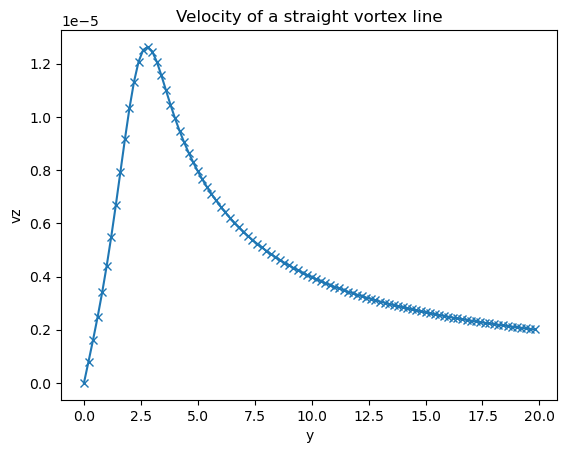

In [35]:
stride = slice(1, -1, 100_000)
plt.plot(fps[stride, 1], vel_num[stride, -1], 'x-')
plt.xlabel('y')
plt.ylabel('vz')
plt.title('Velocity of a straight vortex line')
plt.show()